# Azúcar y Sociedad

## Introducción

[**Sugarscape**](http://en.wikipedia.org/wiki/Sugarscape) es un modelo basado en agentes desarrollado por **Joshua M. Epstein** y **Robert Axtell**, presentado originalmente en _Growing Artificial Societies_. Consta de una rejilla 2D, en la que hay un bien abstracto, llamado `azucar`, los agentes vagan por la rejilla y acumulan `azúcar`.

El modelo original es el primer modelo de agentes a gran escala y ocurría en una rejilla de $51 \times 51$ celdas. En cada `step` los agentes miran alredor, encuentran la celda más cercana con `azúcar`, se mueven y metabolizan (tasa a la que consumen `azúcar`). La simulación puede ser complicada y se puede agregar que cada agente deje contaminación, se reproduzca, herede recursos, transfiera información, comercie, regale, transmita enfermedades, o haga la guerra. También es posible agregar un Gobierno que cobre impuestos cada determinado número de `steps` o que inclusive haya dos tipos de bien (en las simulaciones se llama `especia`).

## Preguntas a responder

- `YA!` Cree un clase `Habitante` que herede de nuestra clase `Agente`, implemente el algoritmo de comportamiento comentado en la introducción. 
- `YA!` Cree un clase `Sugarscape` que herede de nuestra clase `Mundo`. Representa mediante grados de color la fuerza del agente y la cantidad de azúcar en la celda.
- `YA!` Cree una clase `Bien` que represente al `azúcar` de **Sugarscape**.
- `YA!` Ejecuta una simulación sencilla, con agentes consumiendo recursos y acaparándolos. Inicializa los agentes con diferentes capacidades de almacenar azúcar, consumo de azúcar (metabolismo) y rango de visión.
- `YA!` Agrega un factor de regeneración del `azúcar`.
- `YA!` Agrega que el agente muera por hambre.
- `YA!` Agrega un tiempo de vida máximo.
- `YA!` Agrega el comportamiento de que nuevos agentes sean creados cuando un agente muera.
- `YA!` Agrega la `especia` al modelo, también es necesario para vivir. Su valor nutrimental es diferente al del `azúcar`.
- `YA!` Agrega la habilidad de comerciar.
- Agrega una `tribu` al agente. 
- `YA!` Agrega un factor de reproducción asexual. (Si tiene suficiente energía, se divide en dos).
- `YA!` Agrega una variable `sexo`.
- `YA!` Agrega reproducción sexual (Si está en su edad fértil, ambos tienen energía y le transmiten la mitad a su hijo).
- `YA!` Grafica la [**curva de Lorenz**](http://en.wikipedia.org/wiki/Lorenz_curve) y el [**coeficiente de Gini**](http://en.wikipedia.org/wiki/Gini_coefficient), grafica también la población y la cantidad de azúcar. ¿Qué interpretación le das a las gráficas?

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, clear_output
import inspect, traceback

In [2]:
random.seed(10)

Clases `Agente` y `Habitante` vistas en clase

In [3]:
class Agente:
    """ Agente general """
    def __init__(self, tipo, locacion=np.array([0,0])):
        self.tipo = tipo
        self.locacion = locacion
        self.siguiente_accion = None

    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  # Otra manera es usar np.sqrt(np.sum((a-b)**2))
    
    def vecinos(self, agentes):
        pass
    
    def actuar(self, agentes):
        self.locacion =  self.siguiente_accion
        
    def decidir(self, agentes):
        self.siguiente_accion = np.array([random.uniform(0, 1), random.uniform(0, 1)]) # Toma una nueva posición al azar
    
    def actualizar(self, agentes):
        self.decidir(agentes)
        self.actuar(agentes)

In [4]:
class Mundo:
    def __init__(self, agentes, ancho = 5, alto = 5, steps = 10):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color='red', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim


In [5]:
def draw_array(array, **options):

    n, m = array.shape
    plt.axis([-1, m , -1, n])
    return plt.imshow(array, **options)

In [6]:
def decimales(numero):
    if numero == 0:
        return 1
    else:
        return int(85/numero)

### Simulación sencilla

Los agentes nacen ya con sus distintas capacidades. Ningún agente muere por ninguna razón.

In [7]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        # en que "mundo" de bienes esta, este es un objeto tipo Bien

        complete = False 
        
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)     # maxima cantidad de azucar que el habitante puede tener
        self.azucar_acumulada = random.randint(3,10)    # cantidad de azúcar acumulada inicial (endownment)
        self.metabolismo = random.randint(1,4)        # cuanta azucar consume el habitante por turno
        self.rango_vision = random.randint(1,5)      # que tan lejos checa el habitante por locaciones con más azucar (en coordenadas del compás)
        self.vivo = True        # el habitante empieza vivo 
        
        # este código elige aleatoriamente un lugar desocupado para el habitante
        complete = False
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                complete = True
        
    def actuar(self, agentes):
        
        # obtenemos las coordenadas presentes del habitante para facilitar
        x = self.locacion[0]
        y = self.locacion[1]
        
        # creamos arreglo de posibles posiciones futuras y sus valores de azucar
        rangos=[]
        
        # añadimos la posición actual al arreglo
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        # añadimos todas las coordenadas posibles al arreglo
        for i in range(1,self.rango + 1):
            
            # checamos que las coordenadas que estamos viendo no esten ocupadaso fuera de rango 
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y)) # si estan ocupadas o fuera de rango damos valor de -1
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))# agregamos el valor
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i)) # si estan ocupadas o fuera de rango damos valor de -1
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i)) # agregamos el valor
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i)) # si estan ocupadas o fuera de rango damos valor de -1
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i)) # agregamos el valor
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y)) # si estan ocupadas o fuera de rango damos valor de -1
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y)) # agregamos el valor
        
        # sacamos el valor maximo de azucar de las posibilidades
        maxl = lambda x: x[0]                
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]] # creamos un arreglo de todas las
                                                        # posiciones que tienen dicho valor maximo de azucar
        
        newpos = random.choice(coords_max) # elegimos aleatoriamente una posicion de este arreglo
        
        # Habitante se MUEVE
        self.locacion = newpos # actualizamos locacion de habitante
        self.bien.matriz_ocupados[x][y] = 0 # desocupamos la locacion previa del habitante en el objeto bien
        self.bien.matriz_ocupados[newpos[0]][newpos[1]] = 1 # ocupamos la nueva locacion del habitante en el objeto bien
            
        # Habitante agarra azucar   
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)  # añadimos la azucar que hay a lo acumulado del habitante
        self.azucar_acumulada -= self.metabolismo   # Habitante come
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0  # quitamos la azucar que habia del objeto bien

    def actualizar(self, agentes):
        # si el habitante esta vivo, se puede actualizar
        if self.vivo:
            self.actuar(agentes)
            

In [8]:
class Bien():
    
    def __init__(self,x=51 ,y=51):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51) # creamos arreglo de 0s de 51x51
        self.matriz_azucar = np.ones(2601).reshape(51,51) # creamos arreglo de 1s de 51x51
        for i in range(0,len(self.matriz_azucar)): # lo poblamos con un gradiente
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)

    

In [9]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.cantidad_azucar = []
        print ("Creado el mundo")
    
    def animate(self):
        self.draw()
        plt.show()
        clear_output(wait = True)
        
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap = 'YlOrRd', vmax = 9, origin = 'lower') 
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)

    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))


        return self.puntos,
       
    def actualizar(self, step):         
        self.dibujar(step) # Dibuja el mundo

        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.animate()
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])

                        
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames=self.steps, interval=1000, blit=False)

        return anim
    

Creado el mundo


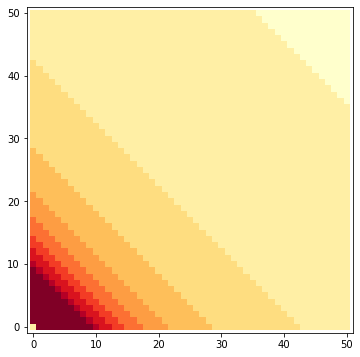

In [10]:
num_agentes = 100
bien_test = Bien()   # creamos objeto Bien, que representa la azucar en el mundo y otros datos

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]    # creamos (num_agentes) agentes con atributos 

con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 25)   # pasamos por el objeto Sugarscape que grafica la simulación


simulacion = con_chiste.simular()    # simulamos

In [11]:
HTML(simulacion.to_html5_video())

## Simulación muerte

Los agentes se mueren dependiendo de su edad, de su cantidad de azucar acumulada

In [168]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        
        complete = False 

        
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)  # Agregamos un tiempo de vida mázimo
        self.age = 0   # Agregamos a que empiece con cero de edad
        self.vivo = True        
        
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                complete = True
        
    def actuar(self, agentes):
        
        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0
            
        if(self.starving() or self.dying()):
            # Eliminamos el que murió 
            self.vivo = False
            self.locacion = np.array([53, 53])   # Le damos una nuev posición 
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0  # Liberamos la posición en la que estaba
    
    # Funciones para saber si tiene que morir
    def starving(self):
        return self.azucar_acumulada < 0   # Si ya no tiene azúcar
    
    def dying(self):
        return self.age > self.lifespan    # Si tiene más edad de lo que debería de vivir

    def actualizar(self, agentes):
        if self.vivo:
            self.actuar(agentes)


In [169]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)


In [170]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []  # Creamos una lista para saber cúantos agentes están vivos
        self.cantidad_azucar = []  # Creamos una lista para saber cúanta azúcar hay
        print ("Creado el mundo")
    
    def animate(self):
        self.draw()
        plt.show()
        clear_output(wait = True)
        
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap = 'YlOrRd', vmax = 9, origin = 'lower') 
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)

    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))


        return self.puntos,
       
    def actualizar(self, step):         
        self.dibujar(step) # Dibuja el mundo

        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.animate()
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])  # Contamos dentro de la matriz de ocupados  cuántos hay
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])  # Contamos dentro de la matriz de azúcar su cantidad

                        
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames=self.steps, interval=1000, blit=False)

        return anim
    

Creado el mundo


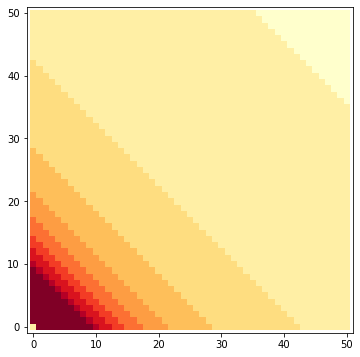

In [190]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 50)


simulacion = con_chiste.simular()

In [191]:
HTML(simulacion.to_html5_video())

In [189]:
con_chiste.agentes_vivos

[[100],
 [92],
 [80],
 [73],
 [65],
 [61],
 [59],
 [56],
 [52],
 [48],
 [48],
 [46],
 [45],
 [45],
 [44],
 [44],
 [43],
 [43],
 [43],
 [42],
 [41],
 [41],
 [40],
 [40],
 [39],
 [39],
 [34],
 [33],
 [32],
 [28],
 [27],
 [27],
 [26],
 [25],
 [21],
 [20],
 [18],
 [16],
 [16],
 [12],
 [11],
 [10],
 [9],
 [4],
 [3],
 [3],
 [2],
 [2],
 [1],
 [1]]

## Curva de Lorenz

In [203]:
Y = []
for i in range(len(con_chiste.agentes_vivos)):
    cosa = con_chiste.cantidad_azucar[i][0]/con_chiste.agentes_vivos[0][0]
    Y.append(cosa)
    # Contamos proporcionalmente la cantidad de azúcar entre la cantidad inicial de agentes
    # Cummulative distribution function

In [197]:
X = [i for i in range(0,len(con_chiste.agentes_vivos))]

# Hacemos el rango de los agentes vivos

In [198]:
X_1 = con_chiste.agentes_vivos

# Hacemos la lista de los agentes vivos

[Text(0, 0.5, 'No. de agentes'), Text(0.5, 0, 'Steps')]

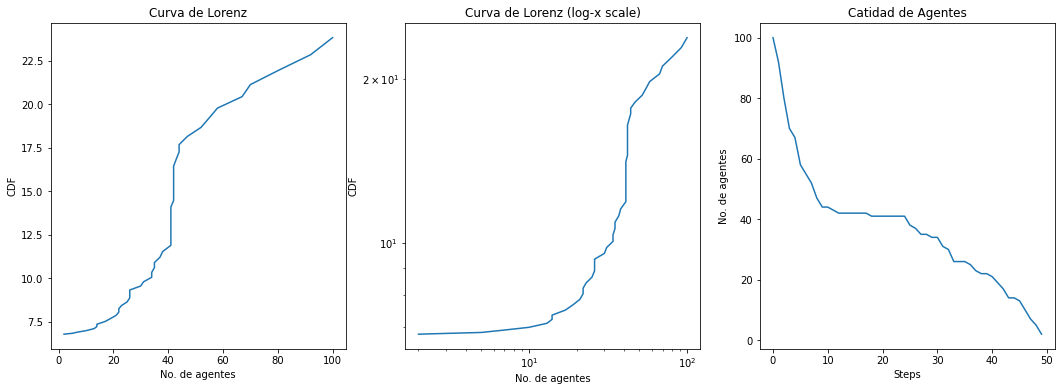

In [208]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

ax[0].plot(X_1, Y)
ax[0].set_title('Curva de Lorenz')
ax[0].set(xlabel = 'No. de agentes', ylabel = 'CDF')
ax[1].loglog(X_1, Y)
ax[1].set_title('Curva de Lorenz (log-x scale)')
ax[1].set(xlabel = 'No. de agentes', ylabel = 'CDF')
ax[2].plot(X, X_1)
ax[2].set_title('Catidad de Agentes')
ax[2].set(xlabel = 'Steps', ylabel = 'No. de agentes')

## Preguntas adicionales

### Solución regeneración del azucar y regeneración de agentes

In [34]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        
     
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)
        self.age = 0
        self.vivo = True
        self.locaciones()

        
    def locaciones(self):
        complete = False 
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                return (complete == True)
        
    def actuar(self, agentes):

        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0
    
        if(self.starving() or self.dying()):
            # Eliminamos el que murió 
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0
            self.add_agent()    # Creamos al nuevo agente ya que murió el otro
            self.bien.cuantos_nuevos.append(1)

    
    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan
    
    def add_agent(self):
        
        # Generamos los atributos que tendrá el nuevo agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)
        self.age = 0
        self.vivo = True
        self.locaciones()

    def actualizar(self, agentes):
        if self.vivo:
            self.actuar(agentes)


In [35]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.growth_rate = growth_rate
        self.cuantos_nuevos = []
        
    # A cada entrada de la matríz de azúcar le vamos a poner una unidad más
    def regeneracion(self):
        for i in range(len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] += self.growth_rate
        

In [36]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_azucar = []
        self.nuevos = self.bien.cuantos_nuevos
        print ("Creado el mundo")
    
    def animate(self):
        self.draw()
        plt.show()
        clear_output(wait = True)
        
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap = 'YlOrRd', vmax = 9, origin = 'lower') 
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)

    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))


        return self.puntos,
       
    def actualizar(self, step):         
        self.dibujar(step) # Dibuja el mundo

        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.animate()
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])
        self.bien.regeneracion() # Aquí se implementa la regeneración, aunque se crea la def en Bien. Se actualiza cada step
                        
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames=self.steps, interval=1000, blit=False)

        return anim

Creado el mundo


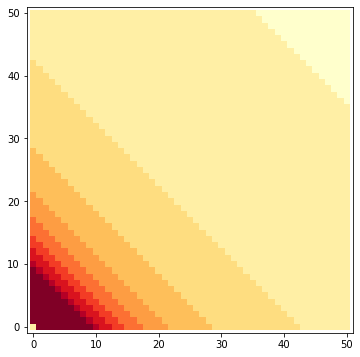

In [41]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 10)


simulacion = con_chiste.simular()

In [42]:
HTML(simulacion.to_html5_video())

In [43]:
con_chiste.nuevos   # Con esto vemos cuantos nuevos se crean en la simulación

[1, 1, 1, 1]

In [44]:
con_chiste.cantidad_azucar

[[2383],
 [2501],
 [2501],
 [2501],
 [2501],
 [2501],
 [2501],
 [2501],
 [2501],
 [2501]]

### Solución especias

In [144]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        

        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)
        self.age = 0
        self.vivo = True
        self.locaciones()

        
    def locaciones(self):
        complete = False 
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                return (complete == True)
        
    def actuar(self, agentes):

        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_buena[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_buena[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_buena[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_buena[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_buena[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_buena[self.newpos[0]][self.newpos[1]] = 0
    
        if(self.starving() or self.dying()):
            # Eliminamos el que murió 
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0
            self.add_agent()        
    
    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan
    
    def add_agent(self):
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)
        self.age = 0
        self.vivo = True
        self.locaciones()
        
    def actualizar(self, agentes):
        if self.vivo:
            self.actuar(agentes)


In [157]:
class Bien():
    
    def __init__(self, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.growth_rate = growth_rate
        self.matriz_azucar = np.ones(1275).reshape(25,51)  # Creamos una matriz de azúcar
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.matriz_especias = np.ones(1326).reshape(26,51)  # Creamos una matríz de especias
        for i in range(0,len(self.matriz_especias)):
            for j in range(0,len(self.matriz_especias[0])):
                self.matriz_especias[i][j] = decimales((i+j)*5)
        self.matriz_buena = np.vstack([self.matriz_azucar, self.matriz_especias])  # Hacemos un stack para hacer una matríz nueva
        # Arriba está el azúcar, abajo son las especias (en la matríz, al graficar es lo inverso)

        
    # Se regeneran a diferentes rates, lo que implica que si estás en la parte de especias, 
    # es más probable que mueras más rápido. (Diferente valor nutrimental)
    def regeneracion(self):
        # Regeneración de azúcar
        for i in range(0, 25):
            for j in range(0,len(self.matriz_buena[0])):
                self.matriz_buena[i][j] += self.growth_rate
        
        # Regeneración de especias
        for i in range(25, 51):
            for j in range(0,len(self.matriz_buena[0])):
                self.matriz_buena[i][j] += self.growth_rate/5


In [158]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_buena = []
        print ("Creado el mundo")
    
    def animate(self):
        self.draw()
        plt.show()
        clear_output(wait = True)
        
    def draw(self):
        draw_array(self.bien.matriz_buena, cmap = 'YlOrRd', vmax = 9) 
        
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)

    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))


        return self.puntos,
       
    def actualizar(self, step):         
        self.dibujar(step) # Dibuja el mundo

        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.animate()
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_buena.append([np.count_nonzero(self.bien.matriz_buena)])
        self.bien.regeneracion() # Regeneración de la matríz de los bienes
                        
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames=self.steps, interval=1000, blit=False)

        return anim

Creado el mundo


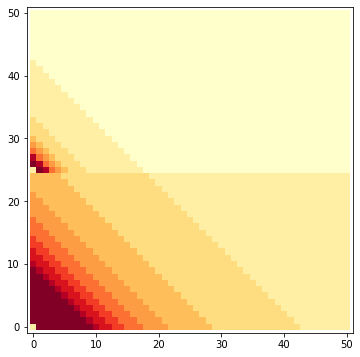

In [159]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 50)


simulacion = con_chiste.simular()

In [160]:
HTML(simulacion.to_html5_video())

### Solución reproducción asexual

Si tienen la edad adecuada y si tienen azúcar acumulada suficiente, entonces tiene la capacidad de reproducirse asexualmente. 

In [35]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        
        
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()



    # Función para saber si tiene la capacidad de reproducirse, si tiene la energía suficiente
    def fertility(self):
        return (self.age > 15  and self.azucar_acumulada > 15)
            
    def locaciones(self):
        complete = False 
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                return (complete == True)
        
    def actuar(self, agentes):

        if(not self.vivo):
            return
        
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1

        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0 

        if(self.dying() or self.starving()):
            # Eliminamos el que murió 
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0
            
        # if para determinar si sí puede reproducirse
        if (self.fertility()):
            self.add_agent() # Si sí, se agrega un agente
            self.bien.cuantos_abebes.append([1]) # Agregamos un 1 para saber cuántos se crean en total

    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan
    
    def add_agent(self):
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()
        #self.fertility()

    def actualizar(self, agentes):
        if self.vivo:
            self.actuar(agentes)


In [36]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.growth_rate = growth_rate
        self.cuantos_abebes = []  # Lista para saber cuántos bebes asexuales fueron creados
        
    def regeneracion(self):
        for i in range(len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] += self.growth_rate
            

In [37]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_azucar = []
        self.abebes = self.bien.cuantos_abebes   # Heredamos la lista de los bebes asexualmente creados
        print ("Creado el mundo")
    
    def animate(self):
        self.draw()
        plt.show()
        clear_output(wait = True)
        
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap = 'YlOrRd', vmax = 9, origin = 'lower') 
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)

    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))


        return self.puntos,
       
    def actualizar(self, step):         
        self.dibujar(step) # Dibuja el mundo

        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.animate()
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])
        self.bien.regeneracion() # Aquí se implementa, aunque se crea la def en Bien
                        
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames=self.steps, interval=1000, blit=False)

        return anim

Creado el mundo


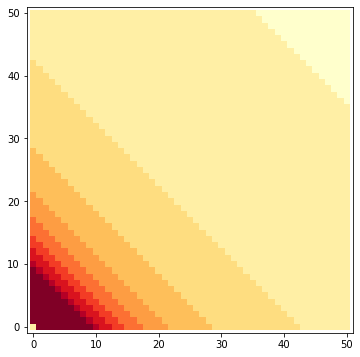

In [38]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 50)


simulacion = con_chiste.simular()

In [39]:
HTML(simulacion.to_html5_video())

In [41]:
len(con_chiste.abebes)  # Podemos ver que, ya que no hay en realidad no hay muchos 'peros' y tenemos 50 steps en total

186

### Solución sexo y reproducción sexual

In [163]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        
        
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)
        self.sexo = random.randint(0,1) # Agregamos sexo
        self.age = 0
        self.vivo = True
        self.locaciones()

    # Función para saber si tiene la capacidad de reproducirse, si tiene la energía suficiente    
    def fertility(self):
        return (self.age > 15  and self.azucar_acumulada > 15)


    def locaciones(self):
        complete = False 
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                return (complete == True)
        
    def actuar(self, agentes):
        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0

        if(self.dying() or self.starving()):
            # Eliminamos el que murió 
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0        
    
    # Las propiedades requeridas del bebé que nacerá de los padres
    def add_baby(self, otro):
        mama = random.randint(1,5)  # Creamos al azar un número que será lo que le quitaremos del papá y de la mamá
        papa = random.randint(1,5)
        self.azucar_acumulada = mama + papa # Le atribuímos al bebé esa cantidad de azúcar inicial
        self.azucar_acumulada -= mama # Le quitamos a la mamá lo que se le agarró
        otro.azucar_acumulada -= papa # Le quitamos al papá lo que se le agarró
        self.capacidad_azucar = random.randint(5,25)   # Atributos generales
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()    

    
    # La decisión del agente si puede o no reproducirse
    def decision_reproduce(self, agentes):
        for agente in agentes:   # Checamos los agentes
            if self.fertility():   # Si es fértil mi agente inicial
                if self != agente:   # Si no es el mismo agente
                    if agente.fertility() and agente.sexo != self.sexo:   # Si el otro agente es fértil y no tiene el mismo sexo
                        self.add_baby(agente)   # Agregamos al bebé
                        self.bien.bebes_nuevos.append(1)   # Agregamos un 1 para ver cuántos bebés se van creando
    
    
    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan
    
    def add_agent(self):
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()


    def actualizar(self, agentes):
        if self.vivo:
            self.actuar(agentes)
            self.decision_reproduce(agentes)     # Buscamos que pueden reproducirse, sí lo hagan



In [164]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.growth_rate = growth_rate        
        self.bebes_nuevos = []    #  Lista para ver cuántos bebes nuevos se crearon 
        
    def regeneracion(self):
        for i in range(len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] += self.growth_rate


In [165]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_azucar = []
        self.bebes = self.bien.bebes_nuevos   # Heredamos la lista de nuevos bebés
        print ("Creado el mundo")
    
    def animate(self):
        self.draw()
        plt.show()
        clear_output(wait = True)
        
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap = 'YlOrRd', vmax = 9, origin = 'lower') 
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)

    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))


        return self.puntos,
       
    def actualizar(self, step):         
        self.dibujar(step) # Dibuja el mundo

        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.animate()
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])
        self.bien.regeneracion() # Aquí se implementa, aunque se crea la def en Bien
                        
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames=self.steps, interval=1000, blit=False)

        return anim
    

Creado el mundo


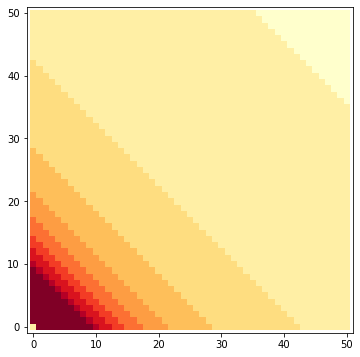

In [166]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 50)


simulacion = con_chiste.simular()

In [167]:
HTML(simulacion.to_html5_video())

In [168]:
len(con_chiste.bebes)   # Cuántos bebés son creados

79

### Simulación comercio

In [42]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        
        
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()

        
    def locaciones(self):
        complete = False 
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                return (complete == True)
        
    def actuar(self, agentes):

        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0
        
        if(self.dying() or self.starving()):
            # Eliminamos el que murió 
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0

            
    def comerciante(self):
        return self.azucar_acumulada > 15 and self.capacidad_azucar < 21 and self.age > 17
        
    # Si los agentes tienen las capacidades requeridas para comerciar, intercambiarán
    # la capacidad de azúcar y la cantidad de azúcar
    def decision_comerciar(self, agentes):
        for agente in agentes:
            if (self.comerciante()):  # Condiciones para que haya trade, que sea comerciante
                if self != agente:
                    if (agente.comerciante()):
                        qty = random.randint(1,5)  # Hacemos al azar la cantidad que se va a intercambiar
                        self.capacidad_azucar += qty   # Hacemos el trade
                        self.azucar_acumulada -= qty
                        agente.capacidad_azucar -= qty
                        agente.azucar_acumulada += qty
    
    
    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan
    
    def add_agent(self):
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()
        self.fertile = self.fertility()

    def actualizar(self, agentes):
        if self.vivo:
            self.actuar(agentes)
            self.decision_comerciar(agentes) # Hacemos que los agentes hagan el trade que puedan lo hagan


In [235]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.growth_rate = growth_rate
        
    def regeneracion(self):
        for i in range(len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] += self.growth_rate




In [239]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_azucar = []
        print ("Creado el mundo")
    
    def animate(self):
        self.draw()
        plt.show()
        clear_output(wait = True)
        
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap = 'YlOrRd', vmax = 9, origin = 'lower') 
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)

    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))


        return self.puntos,
       
    def actualizar(self, step):         
        self.dibujar(step) # Dibuja el mundo

        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.animate()
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])
        self.bien.regeneracion() # Aquí se implementa, aunque se crea la def en Bien
                        
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames=self.steps, interval=1000, blit=False)

        return anim

Creado el mundo


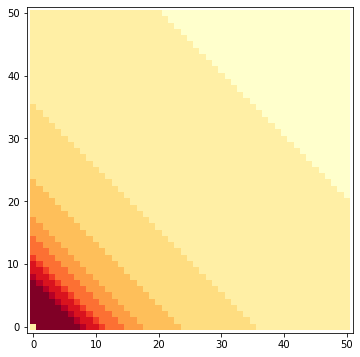

In [240]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 50)


simulacion = con_chiste.simular()

In [241]:
HTML(simulacion.to_html5_video())

### Solución Tribu

In [39]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien  
        
        # Atributos que del agente
        self.tribu = random.randint(0,1)     # Agregamos la tribu al azar del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)
        self.age = 0
        self.vivo = True
        self.locaciones()

        
    def locaciones(self):
        complete = False 
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                return (complete == True)
        
    def actuar(self, agentes):

        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0
    
        if(self.starving() or self.dying()):
            # Eliminamos el que murió 
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0
            self.add_agent()    
    
    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan
    
    def add_agent(self):
        
        # Generamos los atributos que tendrá el nuevo agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50) # Agregamos al azar la tribu del nuevo agente
        self.tribu = random.randint(0,1)        
        self.age = 0
        self.vivo = True
        self.locaciones()

    def actualizar(self, agentes):
        if self.vivo:
            self.actuar(agentes)


In [34]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.growth_rate = growth_rate
        
        
    def regeneracion(self):
        for i in range(len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] += self.growth_rate
        

In [35]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_azucar = []
        print ("Creado el mundo")
    
    def animate(self):
        self.draw()
        plt.show()
        clear_output(wait = True)
        
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap = 'YlOrRd', vmax = 9, origin = 'lower') 
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos_0, = self.ax.plot([], [], 'o', markerfacecolor = 'pink', **plot_args)
        self.puntos_1, = self.ax.plot([], [], 'o', markerfacecolor = 'blue', **plot_args)
    
    def clean_screen(self):
        self.puntos_0.set_data([], [])
        self.puntos_1.set_data([], [])
        return 
    
    def dibujar(self,step):
   
        x_values_0, y_values_0 = [], []
        x_values_1, y_values_1 = [], []
    
        for agente in self.agentes:
            x, y = agente.locacion
    
            if agente.tribu == 0:    # Dependiendo de la tribu es el color del agente
                x_values_0.append(x)
                y_values_0.append(y)
            else:
                x_values_1.append(x)
                y_values_1.append(y)

                
        self.puntos_0.set_data(x_values_0, y_values_0)
        self.puntos_1.set_data(x_values_1, y_values_1)
        
        self.ax.set_title('Paso {}'.format(step))

        return 
          
       
    def actualizar(self, step):         
        self.dibujar(step) # Dibuja el mundo

        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.animate()
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])
        self.bien.regeneracion() # Aquí se implementa, aunque se crea la def en Bien

    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames=self.steps, interval=1000, blit=False)

        return anim
    

Creado el mundo


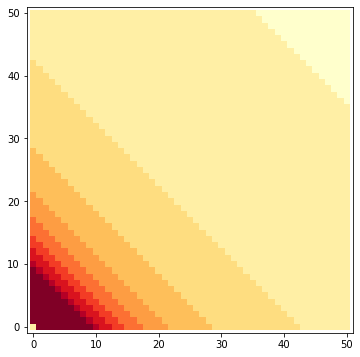

In [37]:
num_agente = 100

bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agente)]

con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 25)


simulacion = con_chiste.simular()

In [38]:
HTML(simulacion.to_html5_video())

## Preguntas adicionales

- ¿Qué pasa si la variable `tribu` afecta el comercio y el sexo? ¿Cómo lo simularías y por qué?

Al definir las condiciones con las que se reproducirán y comerciarán, ponemos una condición de que sea siempre el trade entre distintas tribus y que no se reproduzcan entre distintas tribus.



In [ ]:
    def decision_comerciar(self, agentes):
        for agente in agentes:
            if (self.comerciante()): 
                if self != agente and self.tribu != agente.tribu: ##
                    if (agente.comerciante()):
                        qty = random.randint(1,5) 
                        self.capacidad_azucar += qty   
                        self.azucar_acumulada -= qty
                        agente.capacidad_azucar -= qty
                        agente.azucar_acumulada += qty
    

In [ ]:
    def decision_reproduce(self, agentes):
        for agente in agentes:  
            if self.fertility():   
                if self != agente and self.tribu == agente.tribu:  
                    if agente.fertility() and agente.sexo != self.sexo:   
                        self.add_baby(agente)  
                        self.bien.bebes_nuevos.append(1)   

- ¿Cómo simularías **enfermedad**?

Podría ser que al momento de crear al agente y sus atributos le pongamos un número de enfermedad al azar, al momento de actuar, creamos un número al azar, si es el mismo, se muere el agente. (Como una enfermedad que se activa)


In [ ]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        
        complete = False 

        
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(25,50)  
        self.age = 0   
        self.enfermedad = random.randint(0,5)
        self.vivo = True        
        
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                complete = True
        
    def actuar(self, agentes):
        
        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0
        
        enfermedad = random.randint(0,5)
            
        if(self.starving() or self.dying()):
            # Eliminamos el que murió 
            self.vivo = False
            self.locacion = np.array([53, 53])   
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0  
        
        if(enfermedad == self.enfermedad):
            self.vivo = False
            self.locacion = np.array([53, 53])   
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0  
    



## Bibliografía

- **Epstein, Joshua M.; Axtell, Robert** (October 11, 1996). _Growing artificial societies: social science from the bottom up_. `Brookings Institution Press. p. 224. ISBN 978-0-262-55025-3.`
- **Wikipedia** [_Sugarscape_](http://en.wikipedia.org/wiki/Sugarscape)